# PROCEDURES
9.1 Introduction to Matplotlib - [github link](https://github.com/zephyrowwa/Module-9-Data-Visualization-using-Pandas-Matplotlib-and-Seaborn/tree/main/9.1)

9.2 Plotting with Pandas - [github link](https://github.com/zephyrowwa/Module-9-Data-Visualization-using-Pandas-Matplotlib-and-Seaborn/tree/main/9.2)

9.3 Pandas Plotting Subpackage - [github link](https://github.com/zephyrowwa/Module-9-Data-Visualization-using-Pandas-Matplotlib-and-Seaborn/tree/main/9.3)

# SUPPLEMENTARY ACTIVITIES

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv('/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('/content/earthquakes-1.csv')

In [19]:
quakes

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


In [20]:
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


# Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

<Axes: xlabel='date'>

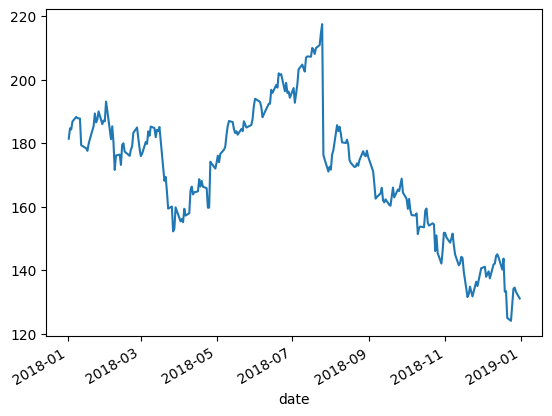

In [21]:
# rolmin = fb['close'].rolling(window='20D').min()
# ax =  rolmin.plot(label='rollin min(20days)')
fb['close'].plot(label='FB closing price')

# Create a histogram and KDE of the change from open to close in the price of Facebook stock.

array([[<Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'close'}>]], dtype=object)

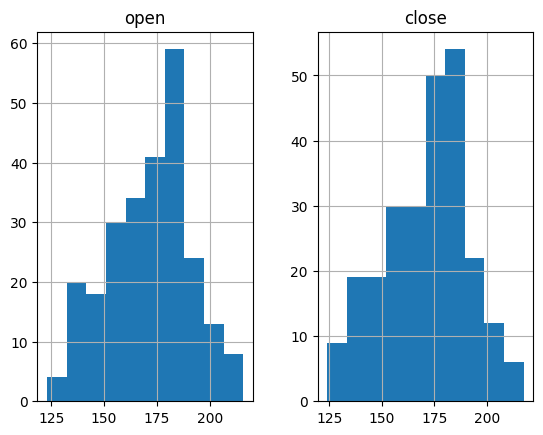

In [22]:
fb.hist(['open','close'])

<Axes: ylabel='Density'>

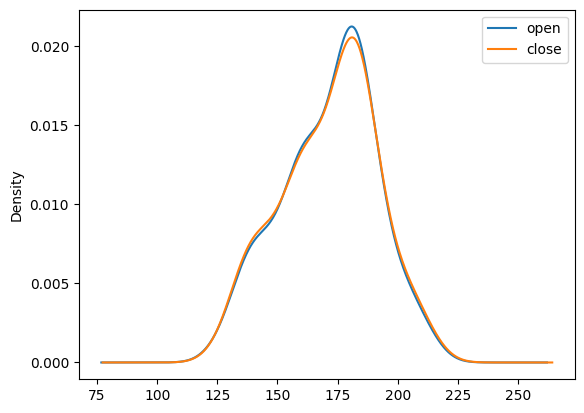

In [23]:
fb.plot(kind='kde', y = ['open','close'])

# Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

In [24]:
quakes.loc[quakes['parsed_place']=='Indonesia']

,mag,magType,time,place,tsunami,parsed_place
9,4.7,mb,1539472814760,"219km SSE of Saparua, Indonesia",0,Indonesia
13,4.5,mb,1539470898340,"120km SSW of Banda Aceh, Indonesia",0,Indonesia
180,5.2,mww,1539405255580,"25km E of Bitung, Indonesia",0,Indonesia
421,4.7,mb,1539331098920,"38km SSW of Nggongi Satu, Indonesia",0,Indonesia
660,4.4,mb,1539258833830,"51km WSW of Kasiguncu, Indonesia",0,Indonesia
...,...,...,...,...,...,...
9041,4.3,mb,1537296305750,"7km WSW of Karangsubagan, Indonesia",0,Indonesia
9075,4.4,mb,1537288723310,"103km W of Kuripan, Indonesia",0,Indonesia
9108,4.0,mb,1537280181100,"123km NE of Bitung, Indonesia",0,Indonesia
9209,4.7,mb,1537256021950,"18km NE of Reuleuet, Indonesia",0,Indonesia


Text(0, 0.5, 'magnitude')

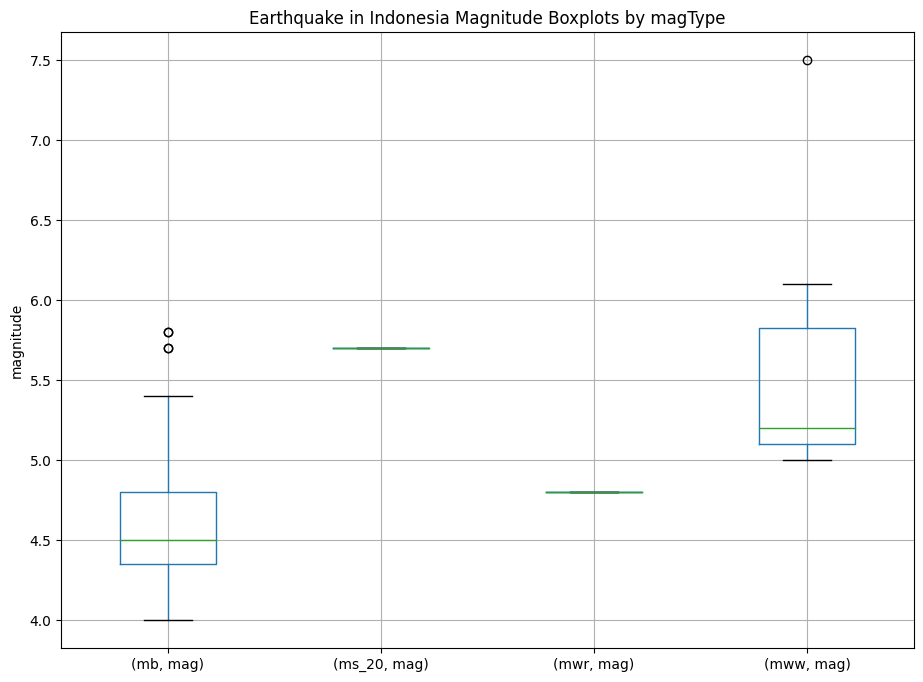

In [25]:
indoq = quakes.query("parsed_place == 'Indonesia'")
indoq[['mag', 'magType']].groupby('magType').boxplot(
 figsize=(11, 8), subplots=False
)
plt.title('Earthquake in Indonesia Magnitude Boxplots by magType')
plt.ylabel('magnitude')

# Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

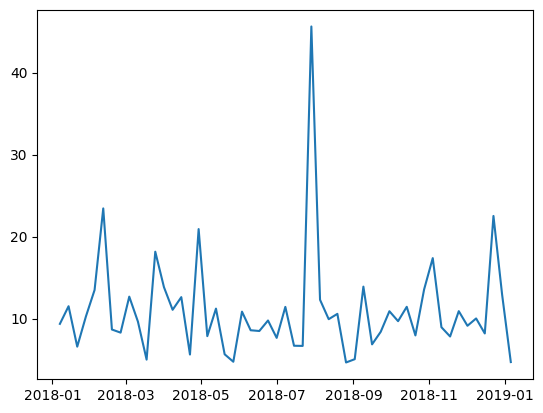

In [26]:
fbw = fb.resample('W').agg({'high': 'max', 'low': 'min'})
fbw['high_low_difference'] = fbw['high'] - fbw['low']
plt.plot(fbw.high_low_difference)

# Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

- The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).
- The second subplot will be a bar plot showing the net effect this had monthly, using resample().
- Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
- Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

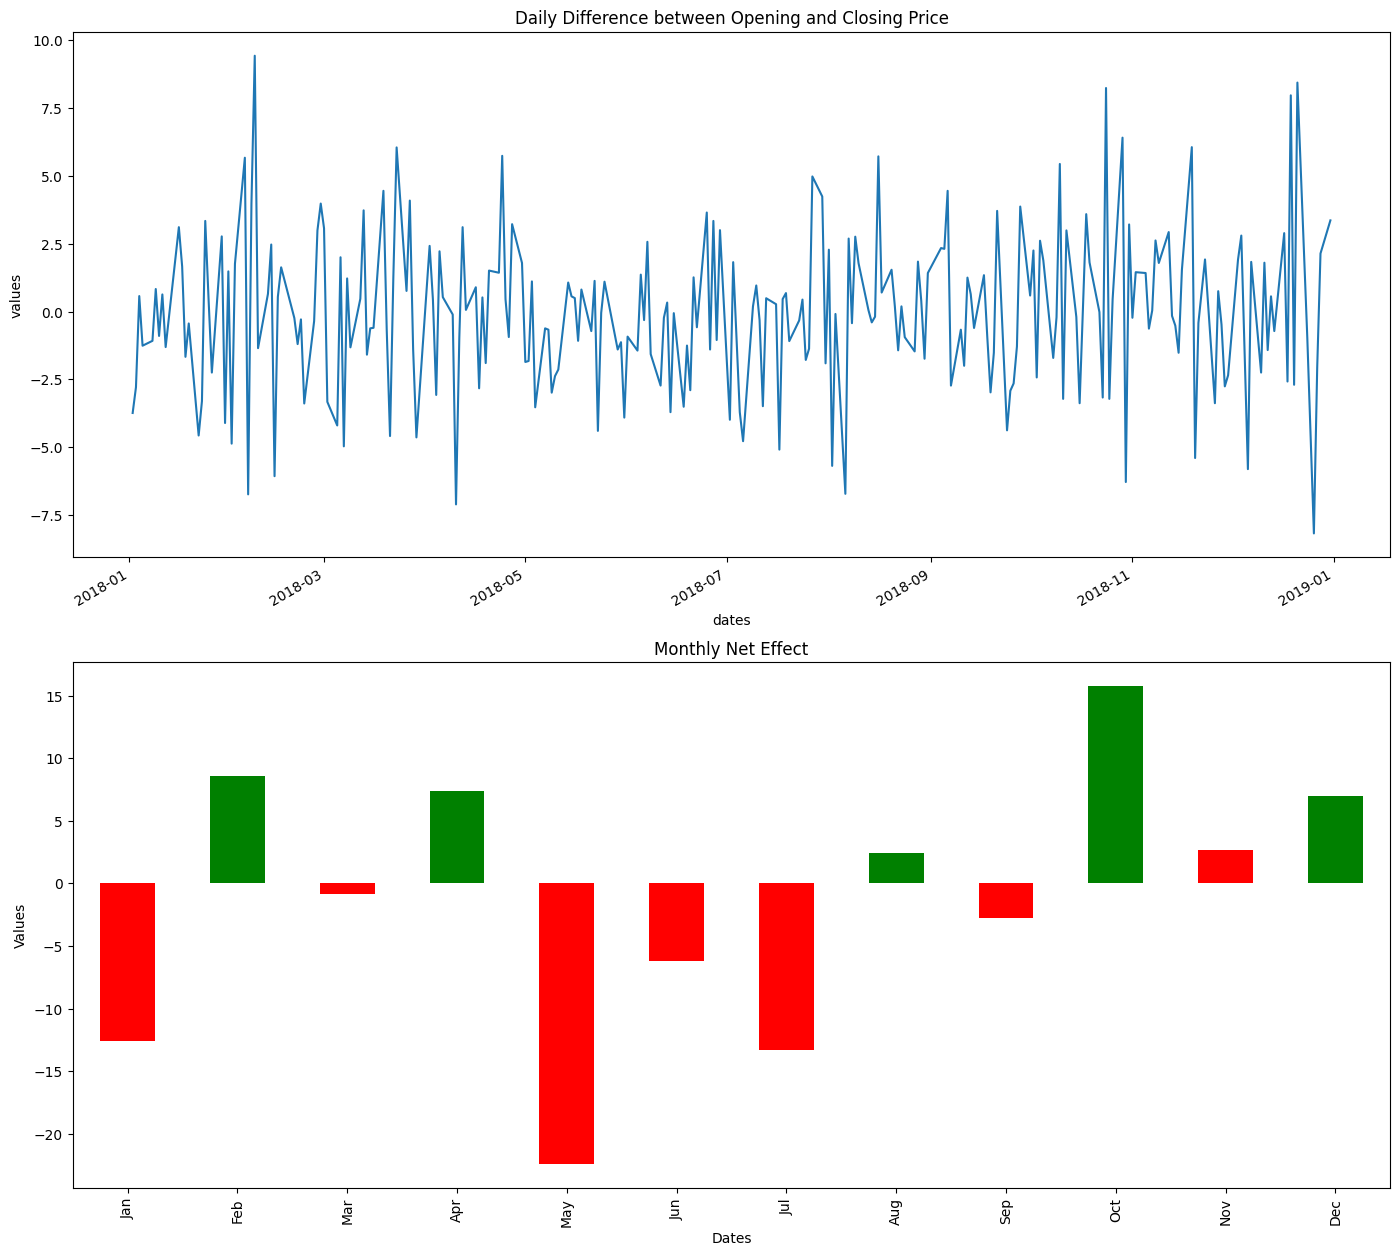

In [27]:
fig, ax = plt.subplots(2, figsize =[17,17])

diff= fb['open']- fb['close']
neteff = diff.resample('M').sum()

diff.plot(ax = ax[0])

ax[0].set_title('Daily Difference between Opening and Closing Price')
ax[0].set_xlabel('dates')
ax[0].set_ylabel('values')

clr=['red', 'green', 'red', 'green', 'red', 'red', 'red', 'green', 'red', 'green', 'red', 'green']

neteff.plot(kind = 'bar', ax = ax[1], color = clr)
ax[1].set_title('Monthly Net Effect')
ax[1].set_xlabel('Dates')
ax[1].set_ylabel('Values')
ax[1].set_xticklabels(neteff.index.strftime('%b'))


# Conclusion

this activity made me familiar to the tool Matplotlib, we used matplotlib to visualize the datasets, there a are conditional statements to output differnet kinds of graphs like bar graph, line graph, sacatter plot, box graph, histograms, etc., these graphs are really customizeable to your own likings and needs, it's hard to customize sometimes, especially when the need is really specific, you really need to dive deep into the documentations and learn every small bits.